In [513]:
import pandas as pd
import matplotlib.pyplot as plt

In [514]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset.shape

(100, 2)

In [515]:
X = dataset.iloc[:, :].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

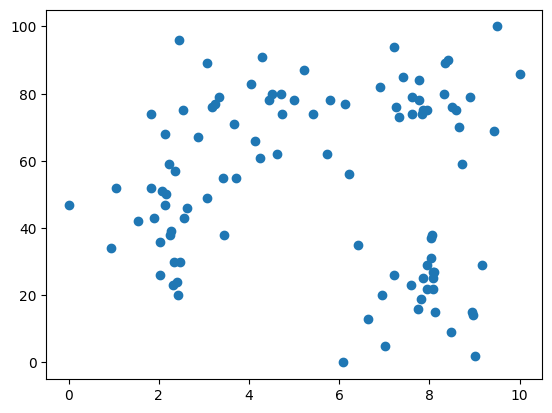

In [516]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

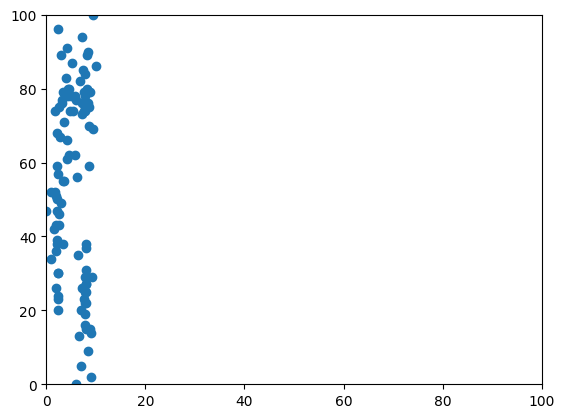

In [517]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [518]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_trans[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

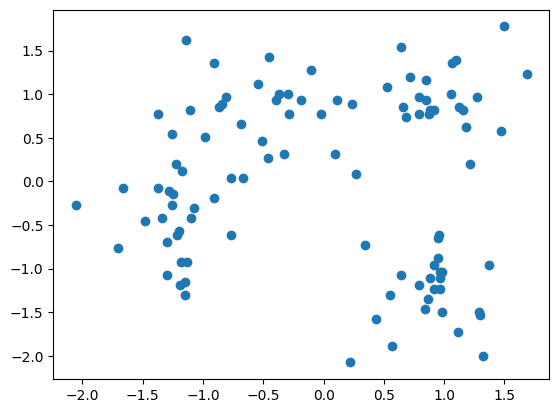

In [519]:
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.show()

In [520]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)

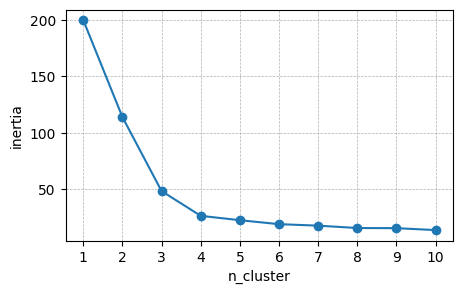

In [521]:
x = range(1, 11, 1)
y = inertia_list
plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='o')
plt.xticks([x for x in range(1, 11)])
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.grid(True, ls='--', lw=0.5)
plt.show()

In [522]:
K=4
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X_trans)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [523]:
y_pred = kmeans.fit_predict(X_trans)
y_pred, X[:5]

(array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
        3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
        3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
        2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
        1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

In [524]:
dataset['cluster']= y_pred
dataset.head()

,hour,score,cluster
0,7.33,73,1
1,3.71,55,0
2,3.43,55,3
3,3.06,89,0
4,3.33,79,0


In [525]:
import numpy as np
index = np.where(y_pred==0)
index

(array([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55,
        56, 57, 67, 78, 85, 90, 92, 95, 97]),)

In [526]:
X[index, 1], X[index, 0]

(array([[55., 89., 79., 62., 74., 78., 66., 71., 67., 80., 74., 78., 76.,
         74., 75., 62., 83., 61., 96., 80., 91., 77., 68., 78., 56., 87.]]),
 array([[3.71, 3.06, 3.33, 5.74, 4.73, 5.  , 4.13, 3.67, 2.86, 4.5 , 5.43,
         4.44, 3.17, 1.83, 2.53, 4.61, 4.04, 4.25, 2.44, 4.71, 4.29, 3.24,
         2.13, 5.8 , 6.21, 5.22]]))

In [527]:
for i in range(K):
    index = np.where(y_pred==i)
    print(i, X[index, 0], f'\n  {X[index, 1]}')

0 [[3.71 3.06 3.33 5.74 4.73 5.   4.13 3.67 2.86 4.5  5.43 4.44 3.17 1.83
  2.53 4.61 4.04 4.25 2.44 4.71 4.29 3.24 2.13 5.8  6.21 5.22]] 
  [[55. 89. 79. 62. 74. 78. 66. 71. 67. 80. 74. 78. 76. 74. 75. 62. 83. 61.
  96. 80. 91. 77. 68. 78. 56. 87.]]
1 [[ 7.33  8.73  7.61  8.42  6.12  8.66  7.95  7.42  9.43  7.21  8.34  8.5
   6.91  7.26  7.76  8.58  7.83  7.85  9.5   8.33  7.61  8.89 10.    7.76]] 
  [[ 73.  59.  74.  90.  77.  70.  75.  85.  69.  94.  89.  76.  82.  76.
   78.  75.  74.  75. 100.  80.  79.  79.  86.  84.]]
2 [[7.22 8.12 7.02 9.17 8.47 6.08 8.03 9.02 7.85 7.94 7.6  6.41 7.75 8.08
  7.94 6.96 8.11 8.94 8.08 7.81 8.07 8.06 8.97 8.03 6.65]] 
  [[26. 15.  5. 29.  9.  0. 31.  2. 25. 22. 23. 35. 16. 27. 29. 20. 27. 15.
  22. 19. 25. 38. 14. 37. 13.]]
3 [[3.43 2.63 3.45 3.06 0.94 1.9  0.   2.16 2.24 2.31 2.43 2.03 1.53 2.14
  2.02 2.06 1.05 2.28 2.56 2.35 2.22 2.33 1.83 2.41 2.46]] 
  [[55. 46. 38. 49. 34. 43. 47. 50. 38. 23. 20. 26. 42. 47. 36. 51. 52. 39.
  43. 57. 59. 30.

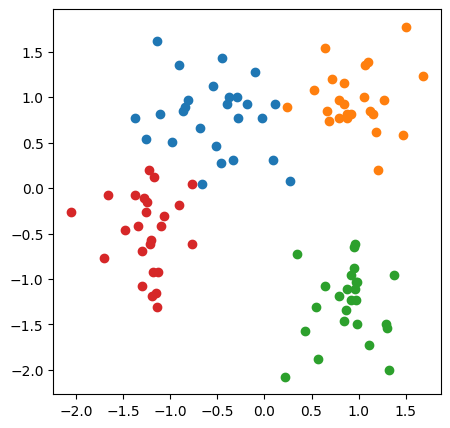

In [528]:
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_trans[index, 0]
    y = X_trans[index, 1]
    plt.scatter(x, y)
plt.show()

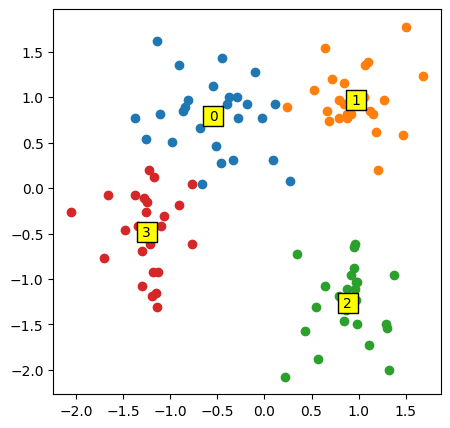

In [529]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_trans[index, 0]
    y = X_trans[index, 1]
    plt.scatter(x, y)
    cx = centers[i, 0]
    cy=  centers[i, 1]
    plt.scatter(cx, cy, c='yellow', s=200, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
plt.show()

In [530]:
X_org = scaler.inverse_transform(X_trans)
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [531]:
centers_org = scaler.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

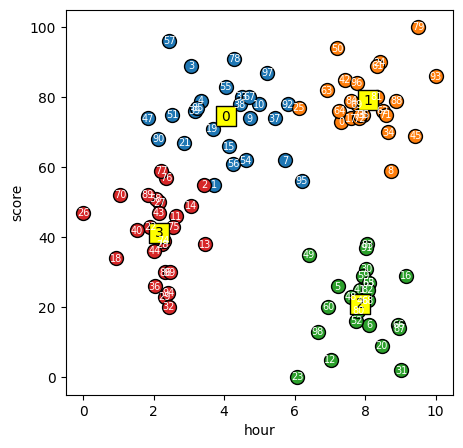

In [532]:
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_org[index, 0]
    y = X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy=  centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=200, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=7)
plt.show()

In [533]:
dataset.loc[31, :]

hour       9.02
score      2.00
cluster    2.00
Name: 31, dtype: float64

In [534]:
#KMeans 모델 생성
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0, 1]].values
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)   
    kmeans.fit(X_trans)
    X_org = scaler.inverse_transform(X_trans)
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, X_org, X_trans, centers_org

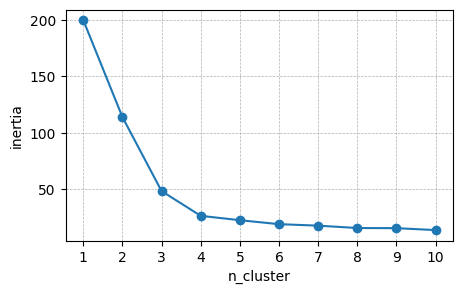

In [535]:
import matplotlib.pyplot as plt
inertia_list = []
for i in range(1, 11):
    kmeans, X, Xtrans, cneters_org = model_kmeans(i)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)
x = range(1, 11, 1)
y = inertia_list
plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='o')
plt.xticks([x for x in range(1, 11)])
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.grid(True, ls='--', lw=0.5)
plt.show()

In [536]:
kmeans, X_org, X_trans, centers_org = model_kmeans(3)
y_pred = kmeans.fit_predict(X_trans)
centers_org

array([[ 2.53282051, 52.48717949],
       [ 7.05861111, 78.33333333],
       [ 7.8552    , 20.96      ]])

In [537]:
def graph(K):
    import matplotlib.pyplot as plt
    import numpy as np 
    kmeans, X_org, X_trans, centers_org = model_kmeans(K)
    y_pred = kmeans.fit_predict(X_trans)
    plt.figure(figsize=(10, 6))
    for i in range(K):
        index = np.where(y_pred==i)
        x = X_org[index, 0]
        y = X_org[index, 1]
        plt.scatter(x, y, s=100, ec='black')
        cx = centers_org[i, 0]
        cy=  centers_org[i, 1]
        plt.scatter(cx, cy, c='yellow', s=200, ec='black', marker='s')
        plt.text(cx, cy, i, ha='center', va='center')
        plt.xlabel('hour')
        plt.ylabel('score')
    for idx, x in enumerate(X_org):
        plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=7)
    plt.show()


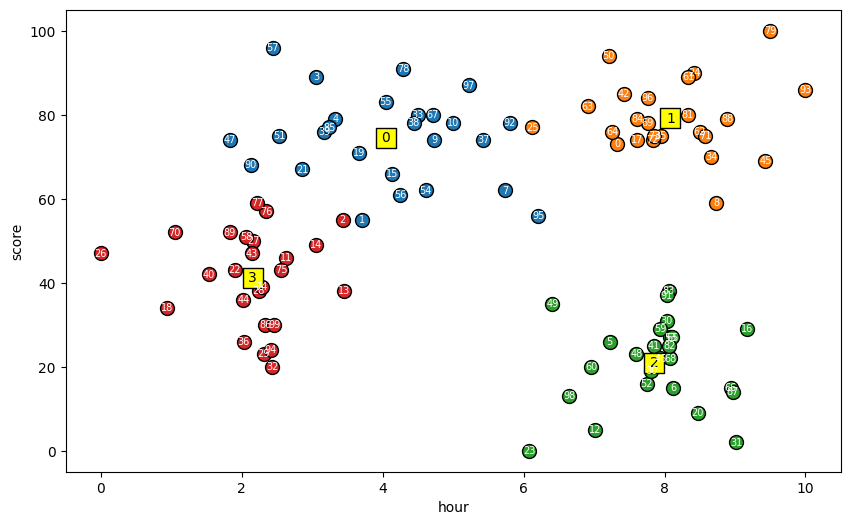

In [538]:
graph(4)

In [539]:
import pandas as pd
df_stu = pd.read_csv('data/학사관리/학생.csv')
df_stu.head()

,학생번호,학생이름,학생학과,학년,생년월일,지도교수
0,92414029,서연우,전산,3,73/10/06,228
1,92414033,김창덕,전산,4,73/10/26,221
2,92514009,이지행,전자,4,73/11/16,311
3,92514023,김형명,전자,4,73/08/29,311
4,92454018,이원구,건축,3,74/09/30,509


In [540]:
df_pro = pd.read_csv('data/학사관리/교수.csv')
df_pro.head()

,교수번호,교수이름,교수학과,임용일,교수직급,급여
0,221,이병렬,전산,75/04/03,정교수,3000000
1,228,이재광,전산,91/09/19,부교수,2500000
2,311,강승일,전자,94/06/09,부교수,2300000
3,509,오문환,건축,92/10/14,조교수,2000000


In [541]:
stu = list(df_stu['학생이름'])
pro = list(df_pro['교수이름'])
names = stu + pro
print(names)

['서연우', '김창덕', '이지행', '김형명', '이원구', '이재영', '박혜경', '김수정', '이병렬', '이재광', '강승일', '오문환']


In [542]:
df = pd.read_csv('data/KMeansData.csv')
df['name']= ''
df.head(2)

,hour,score,name
0,7.33,73,
1,3.71,55,


In [543]:
import random
idx = random.randint(0, len(names)-1)
idx, names[idx]

(5, '이재영')

In [544]:
for i in range(len(df)):
    idx = random.randint(0, len(names)-1)
    df.loc[i, 'name'] = names[idx]
df.tail()

,hour,score,name
95,6.21,56,오문환
96,7.76,84,서연우
97,5.22,87,김형명
98,6.65,13,이재영
99,2.46,30,강승일


In [545]:
kmeans, X, X_trans, centers_org = model_kmeans(4)
y_pred = kmeans.fit_predict(X_trans)
y_pred
df['cluster'] = y_pred
df.head()

,hour,score,name,cluster
0,7.33,73,오문환,1
1,3.71,55,박혜경,0
2,3.43,55,이병렬,3
3,3.06,89,김창덕,0
4,3.33,79,김형명,0


In [546]:
for i in range(4):
    filt = df['cluster']==i
    df2 = df[filt]
    print(f'{i}그룹 {len(df2)}명...........................')
    index = df2.index
    count = 0
    for idx in index:
        print(f'{idx}:{df.loc[idx, 'name']}', end=',')
        count +=1
        if count%10==0 : print()
    print()
    print('-'*100)

0그룹 26명...........................
1:박혜경,3:김창덕,4:김형명,7:이병렬,9:이재영,10:서연우,15:이지행,19:이지행,21:이재영,33:김형명,
37:이재영,38:이재영,39:이재광,47:오문환,51:김수정,54:강승일,55:서연우,56:서연우,57:강승일,67:강승일,
78:이지행,85:김수정,90:오문환,92:이병렬,95:오문환,97:김형명,
----------------------------------------------------------------------------------------------------
1그룹 24명...........................
0:오문환,8:김창덕,17:이병렬,24:이지행,25:김형명,34:서연우,35:박혜경,42:이재광,45:김형명,50:이재광,
61:이원구,62:오문환,63:이병렬,64:이원구,69:오문환,71:김수정,72:이원구,73:김창덕,79:서연우,81:이지행,
84:이병렬,88:이지행,93:이원구,96:서연우,
----------------------------------------------------------------------------------------------------
2그룹 25명...........................
5:이재영,6:이병렬,12:서연우,16:김형명,20:이재광,23:김창덕,30:서연우,31:서연우,41:강승일,46:김창덕,
48:오문환,49:이원구,52:김수정,53:이지행,59:이재영,60:김수정,65:김수정,66:김수정,68:박혜경,80:김창덕,
82:강승일,83:이병렬,87:김형명,91:이병렬,98:이재영,
----------------------------------------------------------------------------------------------------
3그룹 25명...........................
2:이병렬,11:김창덕,13:김형명,14:이지행,18:서연